# 🚀 `Exploratory Data Analysis` (EDA)

En este notebook se realiza la carga de los datos de siniestros viales (`homicidios`) para posteriormente limpiarlos y realizar un análisis exploratorio de cada una de las variables con el objetivo de obtener un dataset para analizar las métricas realizadas para este proyecto. En el documento `Diccionario_de_Datos` se describen los detalles de cada variable.

#### 📥Importaciones 

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

#### 📦 Extracción de los datos y primera exploración

Se extraen los datos desde el archivo de excel y se convierte en Dataframe.

In [219]:
df = pd.ExcelFile('Datasets/homicidios.xlsx')
df1 = pd.read_excel(df, sheet_name='HECHOS')
df2 = pd.read_excel(df, sheet_name='VICTIMAS')

Se realiza una observación del contenido.

In [220]:
df1

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [221]:
df2

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


#### 💱 Transformacion de los datos

Se renombra la columna "ID_HECHO" a "ID".

In [222]:
df2= df2.rename(columns={'ID_hecho': 'ID'})

Se unen ambos DataFrames.

In [223]:
df_homicidios = df2.merge(df1, on='ID', how='inner' )
df_homicidios

,ID,FECHA_x,AAAA_x,MM_x,DD_x,ROL,VICTIMA_x,SEXO,EDAD,FECHA_FALLECIMIENTO,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_y,ACUSADO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


Se realiza una funcion para revisar los tipos de datos por columna y la cantidad de nulos.

In [224]:
def verificar_tipo_datos(df):
    
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)
            
    return df_info

In [225]:
verificar_tipo_datos(df_homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ID,[<class 'str'>],100.00,0.00,0
1,FECHA_x,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
2,AAAA_x,[<class 'int'>],100.00,0.00,0
3,MM_x,[<class 'int'>],100.00,0.00,0
4,DD_x,[<class 'int'>],100.00,0.00,0
5,ROL,[<class 'str'>],100.00,0.00,0
6,VICTIMA_x,[<class 'str'>],100.00,0.00,0
7,SEXO,[<class 'str'>],100.00,0.00,0
8,EDAD,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]",100.00,0.00,0


Se observan 30 columnas y 717 filas. Algunas columnas contienen nulos. 

Se eliminan las columnas que no se utilizarán. 

In [226]:
df_homicidios = df_homicidios.drop(columns=['FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'Altura', 'Cruce', 'Dirección Normalizada', 'AAAA_y', 'MM_y', 'DD_y', 'Calle', 'XY (CABA)', 'VICTIMA_y'])

Se renombra la columna 'VICTIMA_x' a 'VICTIMA'.

In [227]:
df_homicidios = df_homicidios.rename(columns={'VICTIMA_x': 'VICTIMA'})

Se renombra la columna 'FECHA_y' a 'FECHA'.

In [228]:
df_homicidios = df_homicidios.rename(columns={'FECHA_y': 'FECHA'})

Se normaliza el primer carácter de cada dato en las columnas, ordenando sus mayúsculas.

In [229]:
df_homicidios['ID'] = df_homicidios['ID'].str.title()
df_homicidios['ROL'] = df_homicidios['ROL'].str.title()
df_homicidios['VICTIMA'] = df_homicidios['VICTIMA'].str.title()
df_homicidios['SEXO'] = df_homicidios['SEXO'].str.title()
df_homicidios['LUGAR_DEL_HECHO'] = df_homicidios['LUGAR_DEL_HECHO'].str.title()
df_homicidios['TIPO_DE_CALLE'] = df_homicidios['TIPO_DE_CALLE'].str.title()
df_homicidios['pos x'] = df_homicidios['pos x'].str.title()
df_homicidios['pos y'] = df_homicidios['pos y'].str.title()
df_homicidios['PARTICIPANTES'] = df_homicidios['PARTICIPANTES'].str.title()
df_homicidios['ACUSADO'] = df_homicidios['ACUSADO'].str.title()

Se eliminan los registros que no contienen información válida o relevante de las columnas 'PARTICIPANTES', 'VICTIMA' y 'ACUSADO'.

In [230]:
df_homicidios = df_homicidios[(df_homicidios['PARTICIPANTES'] != 'Sd') & (df_homicidios['VICTIMA'] != 'Sd') & (df_homicidios['ACUSADO'] != 'Sd')]

Se cambian los tipos de datos y se rellenan los valores faltantes en las columnas de fechas ('FECHA_FALLECIMIENTO' y 'FECHA') para asegurar que tengan el tipo de dato correcto y que estén en un formato más legible para su análisis. En la columna 'FECHA FALLECIMIENTO' se considera que la víctima falleció en el momento ya que se desconoce la fecha exacta.

In [231]:
# Se convierten las columnas 'FECHA_FALLECIMIENTO' y 'FECHA' a tipo de dato str.
df_homicidios['FECHA_FALLECIMIENTO'] = df_homicidios['FECHA_FALLECIMIENTO'].astype(str)
df_homicidios['FECHA'] = df_homicidios['FECHA'].astype(str)

# Se reemplazan valores 'SD' y nulos en 'FECHA_FALLECIMIENTO'.
df_homicidios.loc[df_homicidios['FECHA_FALLECIMIENTO'] == 'SD', 'FECHA_FALLECIMIENTO'] = df_homicidios['FECHA']
df_homicidios['FECHA_FALLECIMIENTO'] = df_homicidios['FECHA_FALLECIMIENTO'].fillna(df_homicidios['FECHA'])

# Se elimina el carácter 'T' en 'FECHA_FALLECIMIENTO'.
df_homicidios['FECHA_FALLECIMIENTO'] = df_homicidios['FECHA_FALLECIMIENTO'].str.replace('T', ' ')

Se renombra la columna 'FECHA' a 'FECHA_SINIESTRO'.


In [232]:
df_homicidios = df_homicidios.rename(columns={'FECHA': 'FECHA_SINIESTRO'})

Se renombra la columna 'HORA' a 'HORA_SINIESTRO'.

In [233]:
df_homicidios = df_homicidios.rename(columns={'HORA': 'HORA_SINIESTRO'})

Se eliminan todas las comas de los valores en la columna 'LUGAR_DEL_HECHO'.

In [234]:
df_homicidios['LUGAR_DEL_HECHO'] =df_homicidios['LUGAR_DEL_HECHO'].str.replace(',', '')

Se remueve el año de la columna 'ID'.

In [235]:
df_homicidios['ID'] = df_homicidios['ID'].str.split('-').str[1]

Se buscan y reemplazan los duplicados en la columna 'ID'.

In [236]:
# Se identifican duplicados.
duplicates = df_homicidios.duplicated('ID')

# Se reemplazan duplicados con NaN.
df_homicidios.loc[duplicates, 'ID'] = np.nan

# Se rellena NaN con el índice correspondiente.
df_homicidios['ID'] = df_homicidios['ID'].fillna(df_homicidios.index.to_series())

# Se convierte la columna 'ID' a int.
df_homicidios['ID'] = df_homicidios['ID'].astype(int)

Se completan los valores faltantes en "EDAD" con la media de todos los valores en esa columna para obtener un análisis más preciso.

In [237]:
# Se convierte la columna 'EDAD' a numérica, ignorando los errores.
df_homicidios['EDAD'] = pd.to_numeric(df_homicidios['EDAD'], errors='coerce')

# Se calcula la media de los valores numéricos en la columna 'EDAD'.
mean = df_homicidios['EDAD'].mean()

# Se reemplaza 'Sd' con la media.
df_homicidios['EDAD'] = df_homicidios['EDAD'].fillna(mean)

# Se convierte la columna 'EDAD' de nuevo a int.
df_homicidios['EDAD'] = df_homicidios['EDAD'].astype(int)

Se observan los cambios realizados.

In [238]:
df_homicidios.head(2)

,ID,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA_SINIESTRO,HORA_SINIESTRO,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO
0,1,Conductor,Moto,Masculino,19,2016-01-01 00:00:00,1,2016-01-01,04:00:00,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.47533969,-34.68757022,Moto-Auto,Auto
1,2,Conductor,Auto,Masculino,70,2016-01-02 00:00:00,1,2016-01-02,01:15:00,1,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.50877521,-34.66977709,Auto-Pasajeros,Pasajeros


Se crea una nueva columna 'ID_' para asignar identificadores únicos.

In [239]:
df_homicidios['ID_'] = range(1, len(df_homicidios) + 1)

Se crea una funcion 'clean_data' para eliminar la columna 'ID' y renombrar la columna 'ID_' a 'ID'.

In [240]:
def clean_data(df):
    # Drop column: 'ID'
    df = df.drop(columns=['ID'])
    # Rename column 'ID_' to 'ID'
    df = df.rename(columns={'ID_': 'ID'})
    return df

# Se crea una copia del DataFrame original.
df = clean_data(df_homicidios.copy())
df.head(2)

,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA_SINIESTRO,HORA_SINIESTRO,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,ID
0,Conductor,Moto,Masculino,19,2016-01-01 00:00:00,1,2016-01-01,04:00:00,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.47533969,-34.68757022,Moto-Auto,Auto,1
1,Conductor,Auto,Masculino,70,2016-01-02 00:00:00,1,2016-01-02,01:15:00,1,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.50877521,-34.66977709,Auto-Pasajeros,Pasajeros,2


Se observa la evolución anual de la cantidad de víctimas.

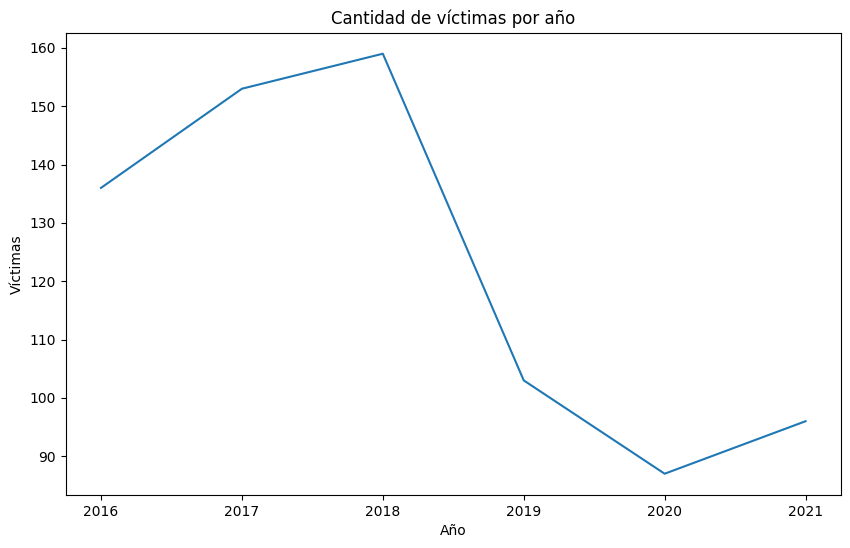

In [241]:
# Se convierte la columna 'FECHA_SINIESTRO' a datetime.
df['FECHA_SINIESTRO'] = pd.to_datetime(df['FECHA_SINIESTRO'])

# Se extrae el año de la fecha.
df['Year'] = df['FECHA_SINIESTRO'].dt.year

# Se agrupa por año y suma la cantidad de víctimas.
grouped = df.groupby('Year')['N_VICTIMAS'].sum()

# Se crea el gráfico de líneas.
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values)
plt.xlabel('Año')
plt.ylabel('Víctimas')
plt.title('Cantidad de víctimas por año')
plt.show()

Realizando la comparativa entre 2018 y 2020, se puede observar que hubo una perdida de vidas humanas del 57% en 2020 respecto al 2018.
Ésto podría deberse a la implementación de restricciones a la hora de conducir por la pandemia COVID-19 en el año 2020, el cual mostró disminución de víctimas fatales debido a la baja conducción de vehículos y circulación de peatones.

Se calcula el porcentaje de víctimas por rol a lo largo de los años en nuestros datos.

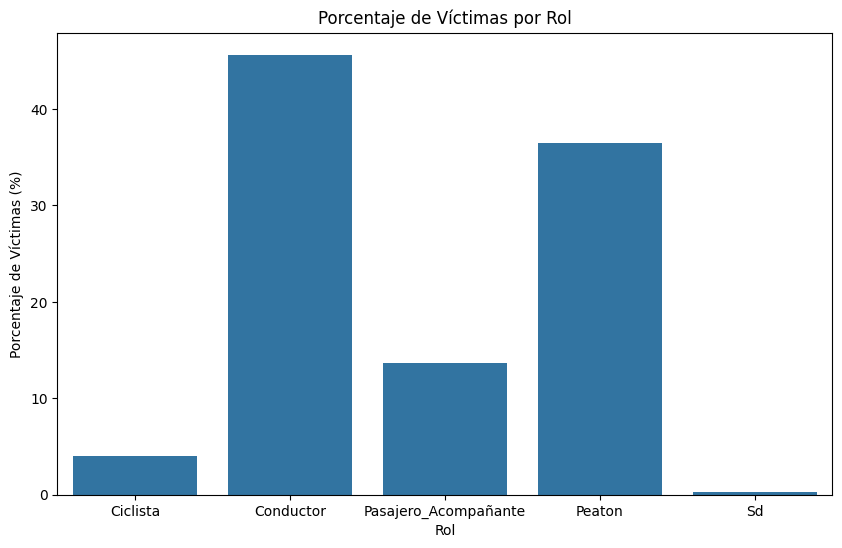

In [242]:
# Se calcula el total de N_VICTIMAS.
total_victimas = df['N_VICTIMAS'].sum()

# Se agrupa por ROL y se calcula la suma de N_VICTIMAS para cada ROL.
grouped = df.groupby('ROL')['N_VICTIMAS'].sum()

# Se calcula el porcentaje de N_VICTIMAS para cada ROL.
grouped = grouped / total_victimas * 100

# Se convierte la serie en un DataFrame.
df_grouped = grouped.reset_index()

# Se crea el gráfico de tabla.
plt.figure(figsize=(10,6))
sns.barplot(x='ROL', y='N_VICTIMAS', data=df_grouped)
plt.xlabel('Rol')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()

Más del 40% del total de víctimas de accidentes provistos en nuestros datos, son representados por conductores, siendo el segundo lugar el peaton y tercero pasajero_acompañante.

Se visualiza la distribución porcentual de víctimas según el género.

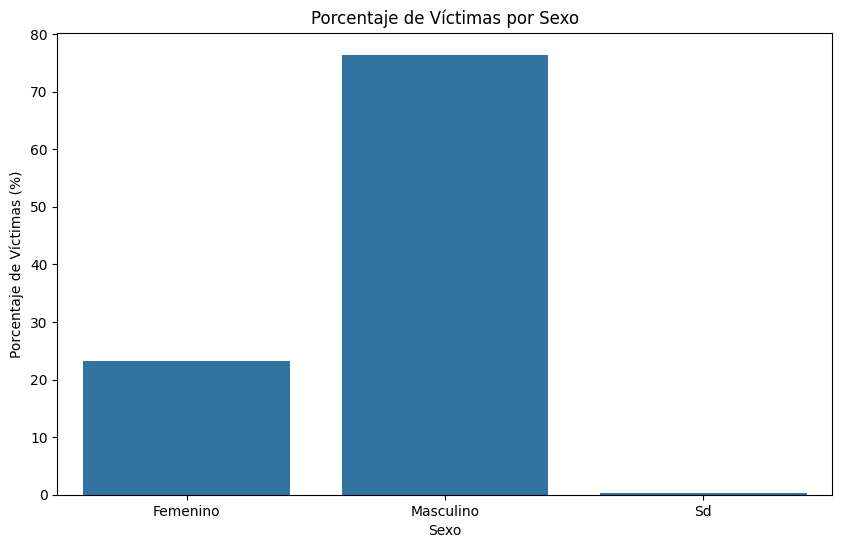

In [243]:
# Se calcula el total de VICTIMAS X GENERO.
total_victimas = df['N_VICTIMAS'].sum()

# Se grupa por ROL y se calcula la suma de N_VICTIMAS para cada ROL.
grouped = df.groupby('SEXO')['N_VICTIMAS'].sum()

# Se calcula el porcentaje de N_VICTIMAS para cada ROL.
grouped = grouped / total_victimas * 100

# Se convierte la serie en un DataFrame.
df_grouped = grouped.reset_index()

# Se crea el gráfico de tabla.
plt.figure(figsize=(10,6))
sns.barplot(x='SEXO', y='N_VICTIMAS', data=df_grouped)
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Sexo')
plt.show()

Al intentar realizar gráficos sobre edad por rol de la victima, o edad sobre número de víctimas, el rango del eje X (que representa la edad) es poco legible, por lo que se crea una columna "rango_edad" para poder visualizar mejor estos gráficos:

In [244]:
# Creamos los rangos de edad
bins = [0, 20, 40, 60, 90]
labels = ['1-20', '21-40', '41-60', '61-90']
df['Rango_Edad'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=False)

Se crea el gráfico: N_VICTIMAS por Rango_Edad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6580\16712097.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Rango_Edad')['N_VICTIMAS'].sum().plot(kind='bar')


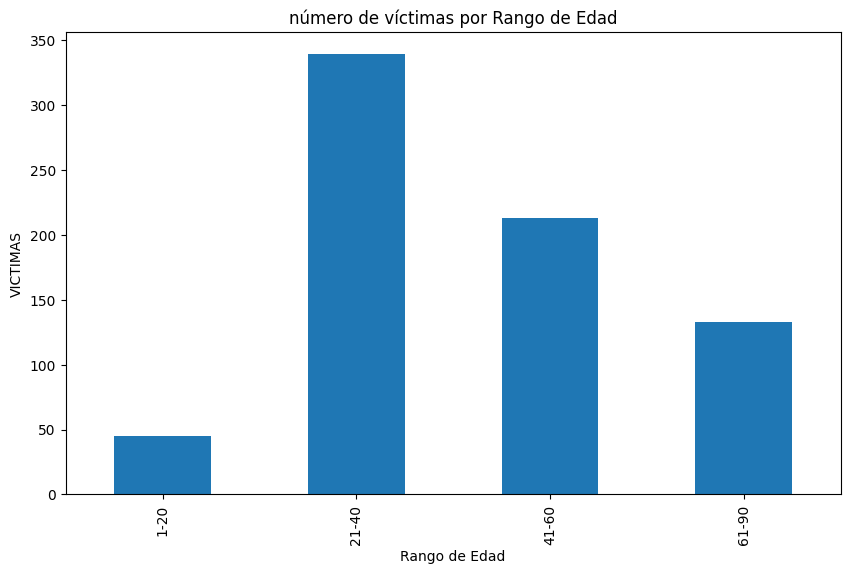

In [245]:
plt.figure(figsize=(10,6))
df.groupby('Rango_Edad')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Rango de Edad')
plt.ylabel('VICTIMAS')
plt.title('número de víctimas por Rango de Edad')
plt.show()

Podemos observar que el rango de edad por accidentes es dominado por las personas que se encuentran en un rango de 21 a 40 años, siendo en su mayoría conductores masculinos.

Se crea el gráfico: ROL por Rango_Edad.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6580\3633847271.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Rango_Edad','ROL']).size().unstack().plot(kind='bar',stacked=False)


<Figure size 1000x600 with 0 Axes>

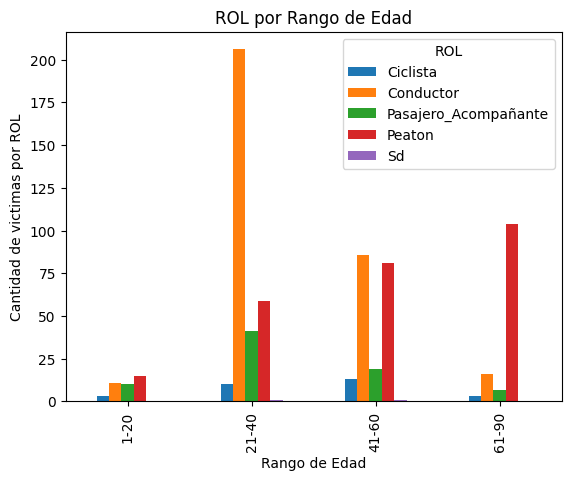

In [246]:
plt.figure(figsize=(10,6))
df.groupby(['Rango_Edad','ROL']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de victimas por ROL')
plt.title('ROL por Rango de Edad')
plt.show()

Se crea el gráfico: N_VICTIMAS por COMUNA.

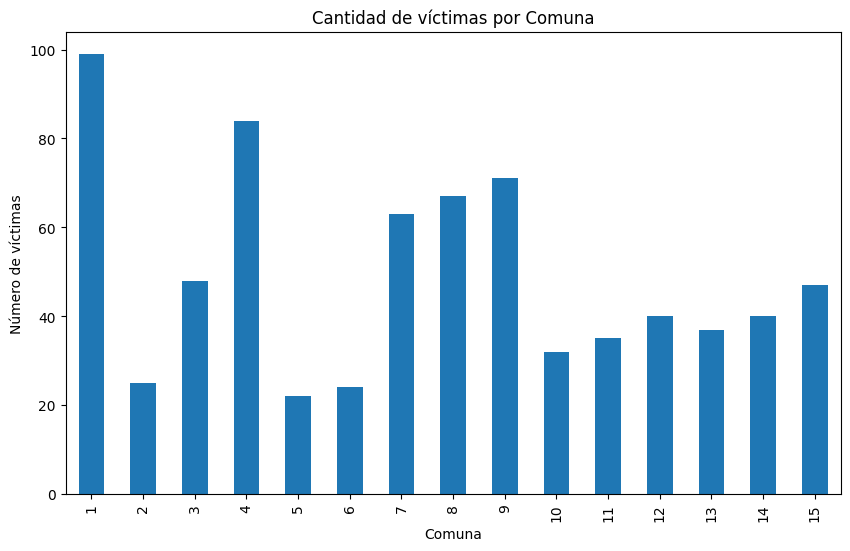

In [247]:
plt.figure(figsize=(10,6))
df.groupby('COMUNA')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Comuna')
plt.ylabel('Número de víctimas')
plt.title('Cantidad de víctimas por Comuna')
plt.show()

Se crea el gráfico: Porcentaje de N_VICTIMAS por VICTIMA.

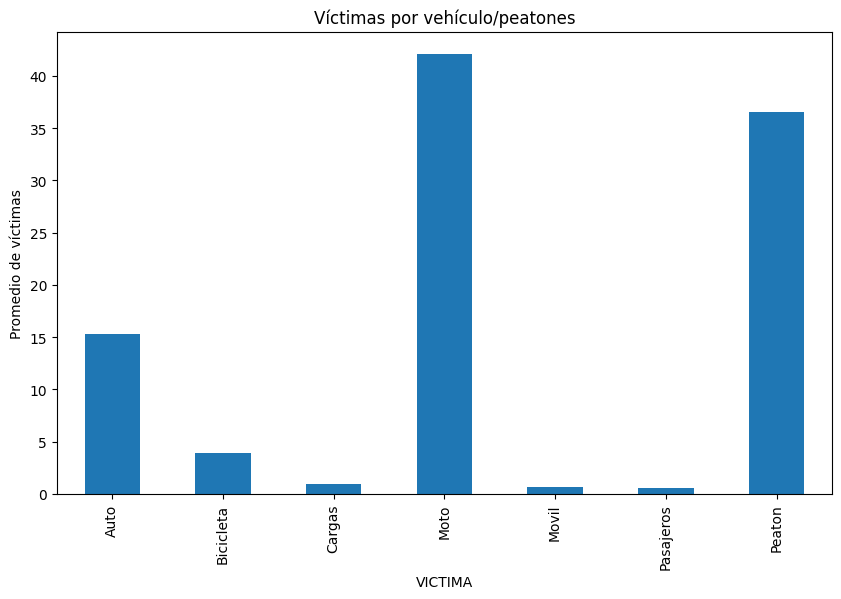

In [248]:
plt.figure(figsize=(10,6))
(df.groupby('VICTIMA')['N_VICTIMAS'].sum() / df['N_VICTIMAS'].sum() * 100).plot(kind='bar')
plt.xlabel('VICTIMA')
plt.ylabel('Promedio de víctimas')
plt.title('Víctimas por vehículo/peatones')
plt.show()

Se visualiza la evolución del número de accidentes en cada comuna a lo largo de los años:

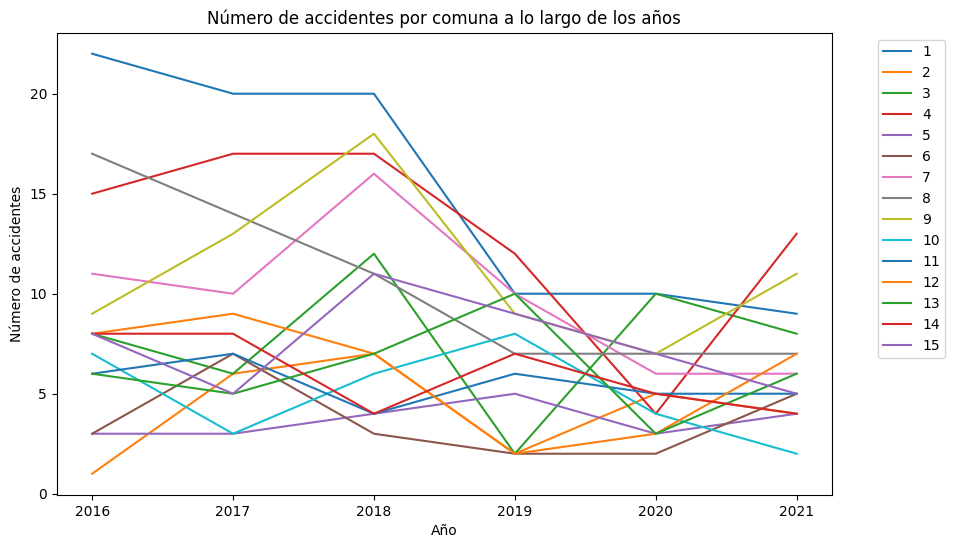

In [249]:
# Se convierte la columna 'FECHA_SINIESTRO' a datetime.
df['FECHA_SINIESTRO'] = pd.to_datetime(df['FECHA_SINIESTRO'])

# Se extrae el año de la fecha.
df['Year'] = df['FECHA_SINIESTRO'].dt.year

# Se agrupa por año y comuna y contamos el número de accidentes.
grouped = df.groupby(['Year', 'COMUNA']).size()

# Se desapila el DataFrame agrupado para tener una columna por comuna.
grouped = grouped.unstack()

# Se crea el gráfico de líneas.
plt.figure(figsize=(10,6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], label=column)
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por comuna a lo largo de los años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 🚀 Informe estadístico sobre las víctimas fatales a causa de siniestros viales en la Ciudad Autónoma de Buenos Aires. Año 2021.


Se recolecto información de la página: 
https://buenosaires.gob.ar/sites/default/files/2023-04/victimas_fatales_2021_OMSV_%281%29.pdf

Víctimas fatales a 7 y a 30 días – evolución histórica.

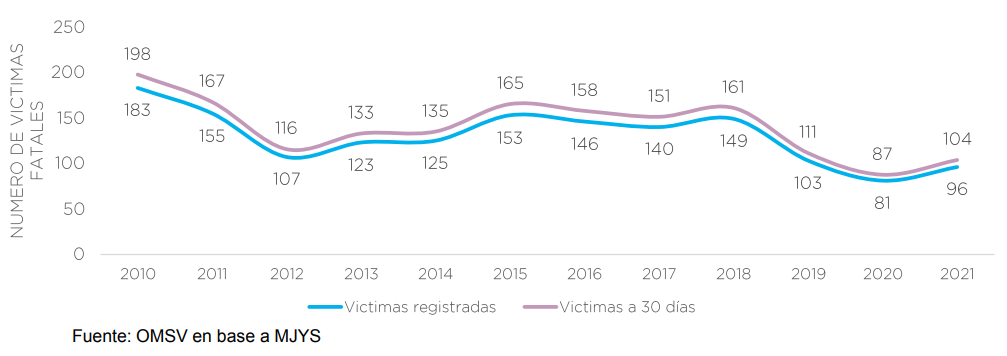

In [250]:
# Víctimas fatales registradas y estimadas a 30 días. Ciudad de Buenos Aires, 2010-2021. Valores absolutos.
Image("images/1.png")

Contexto de la Seguridad Vial en CABA.

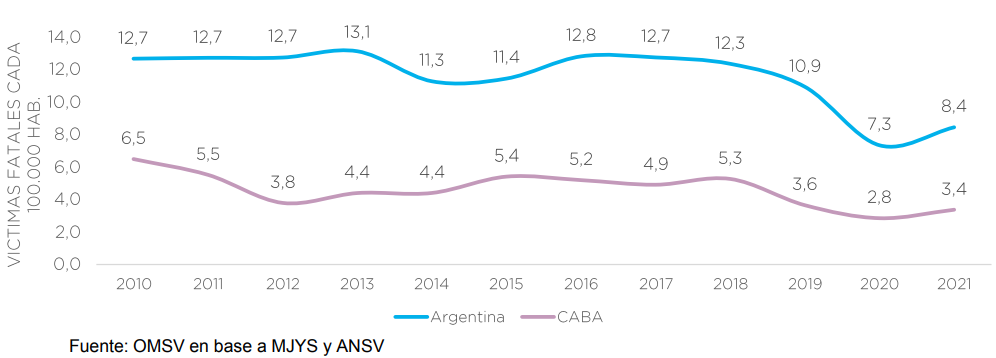

In [251]:
# Tasa de mortalidad, Ciudad de Buenos Aires y Total Argentina, 2010 - 2021. (victimas fatales cada 100.000 habitantes).
Image("images/2.png")

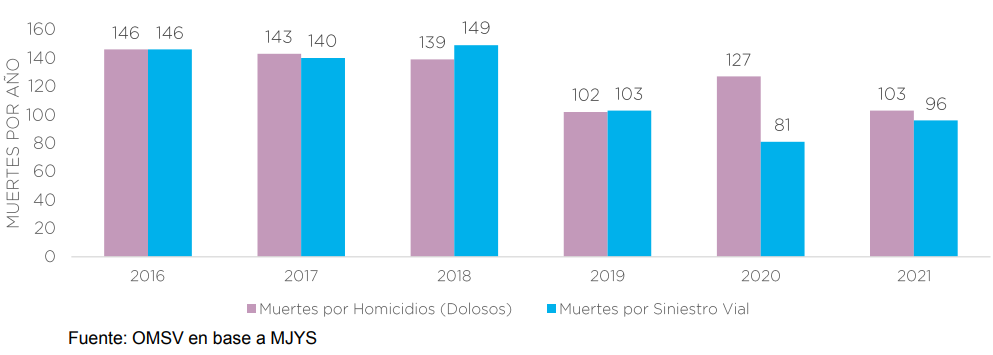

In [252]:
# Muertes por siniestros viales y muertes por homicidios dolosos de la Ciudad de Buenos Aires, 2016 - 2021. Valores Absolutos.
Image("images/3.png")

Perfil demográfico de las víctimas fatales.

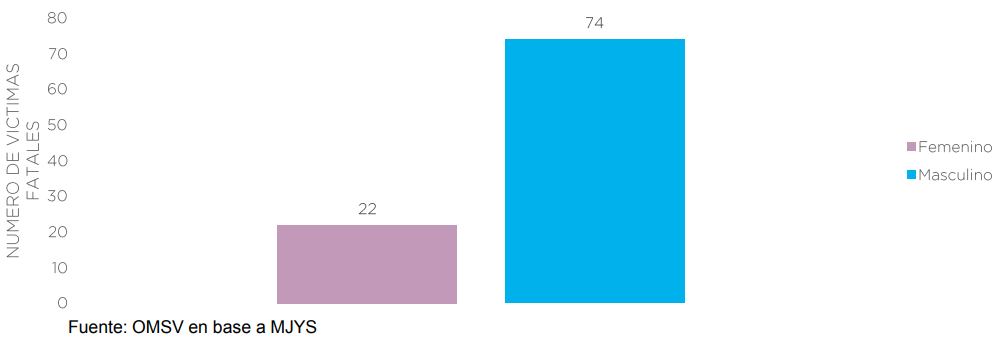

In [253]:
# Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2021. Valores absolutos.
Image("images/4.png")

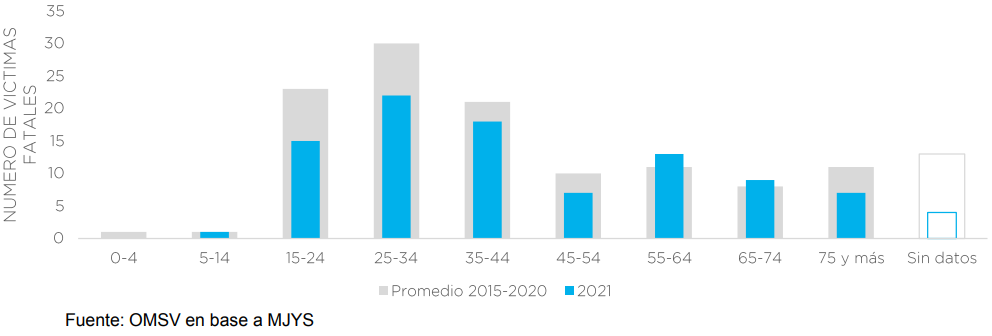

In [254]:
# Víctimas fatales según grupo etario. Ciudad de Buenos Aires, año 2021. Valores absolutos.
Image("images/5.png")

Estadísticas según tipo de usuario/a de la vía.

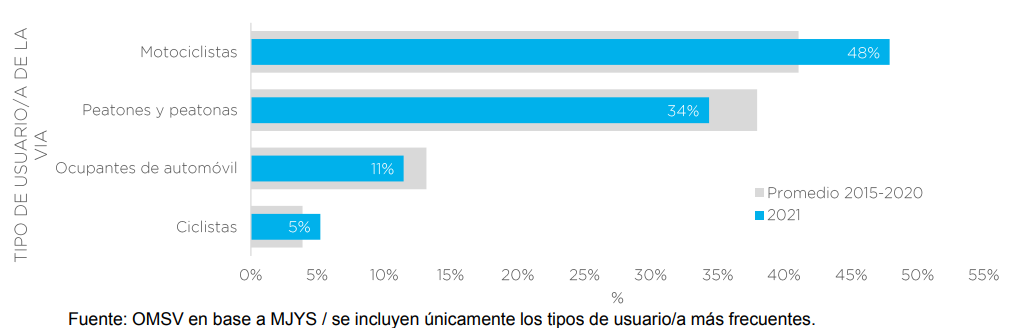

In [255]:
# Víctimas fatales según tipo de usuario/a de la vía. Ciudad de Buenos Aires, año 2021 y promedio 2015-2020. Porcentajes.
Image("images/6.png")

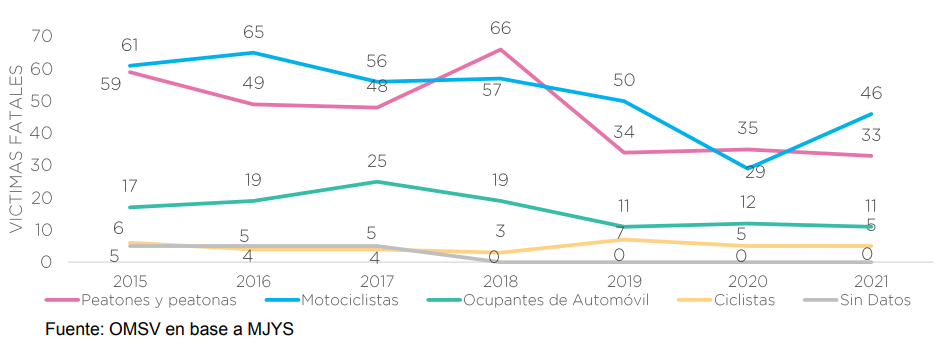

In [256]:
# Víctimas fatales según tipo de usuario/a de la vía. Ciudad Autónoma de Buenos Aires, 2015-2021.
Image("images/7.png")

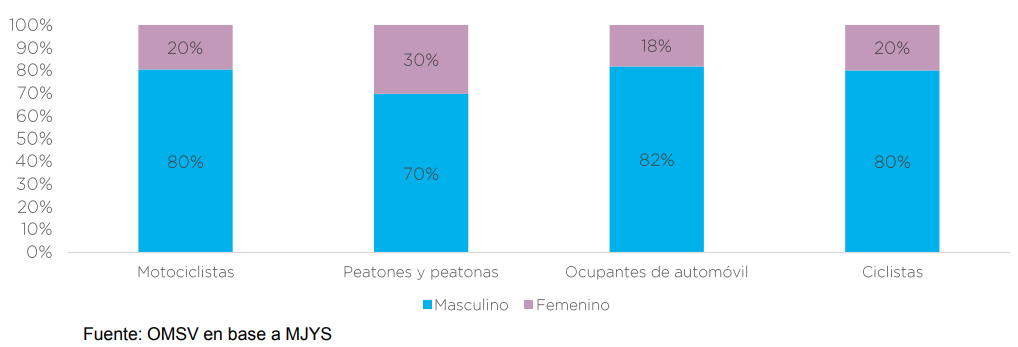

In [257]:
# Víctimas fatales por tipo de usuario/a de la vía según sexo. Ciudad de Buenos Aires, año 2021. Porcentajes.
Image("images/8.png")

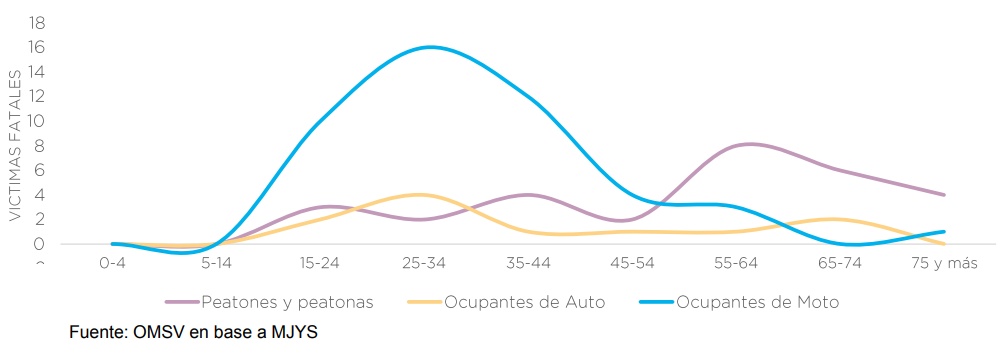

In [258]:
# Víctimas fatales motociclistas, peatones/as, ocupantes de automóvil según grupo etario. Ciudad de Buenos Aires, año 2021. Valores absolutos.
Image("images/9.png")

Distribución temporo espacial de las víctimas fatales.

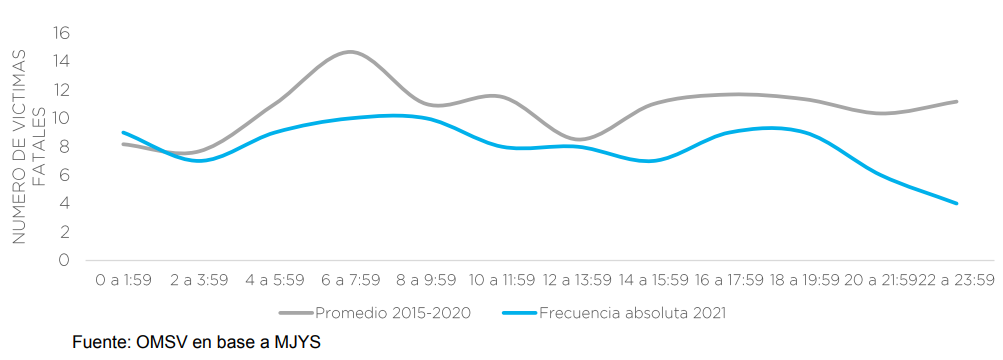

In [259]:
# Víctimas fatales según franja horaria de ocurrencia del hecho. Ciudad de Buenos Aires, año 2021 comparación con promedio 2015-2020. Valores absolutos.
Image("images/10.png")

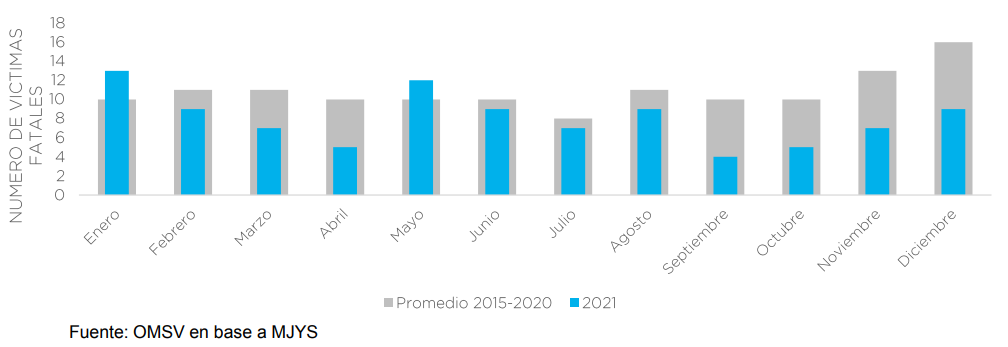

In [260]:
# Víctimas fatales según mes de ocurrencia. Ciudad de Buenos Aires, año 2021 comparación con promedio 2015-2020. Valores absolutos.
Image("images/11.png")

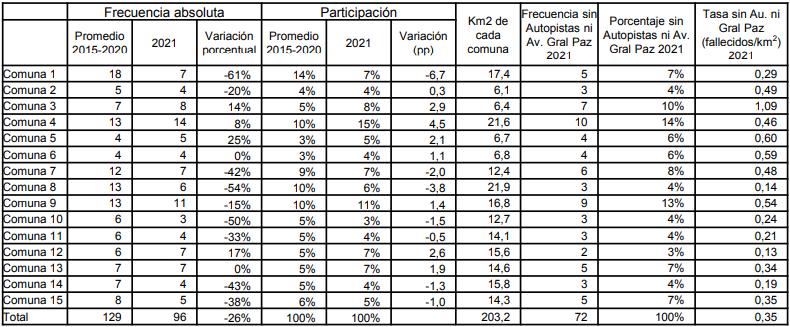

In [261]:
# Tabla de víctimas fatales según Comuna. Ciudad de Buenos Aires, año 2021. Porcentajes y tasa de víctimas/superficie (km2).
Image("images/12.png")

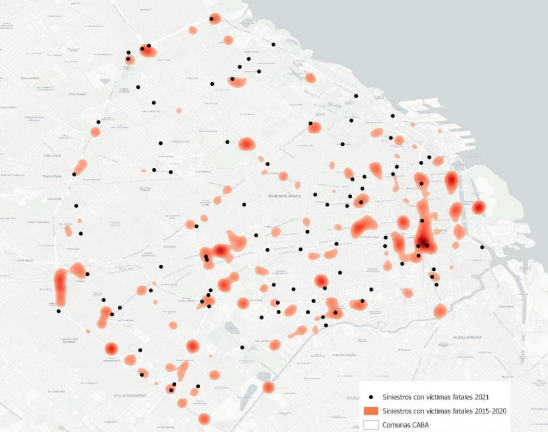

In [262]:
# Mapa con la ubicación de las victimas fatales. Ciudad de Buenos Aires, 2015-2020 y 2021.
Image("images/13.png")

#### 🚀 Observaciones:

Durante el año 2021 se registraron 96 víctimas fatales en 96 hechos. Las víctimas fatales que ocurrieron en un lapso de 30 días del siniestro fueron 104. 

La tasa de mortalidad (3,2 fallecidos cada 100.000 habitantes) de la Ciudad se encuentra por debajo de las observadas a nivel nacional, con una evolución similar en ambos distritos para los años 2019, 2020 y 2021. 

Más de tres cuartas partes de las víctimas fatales fueron de sexo masculino (77%) y el 49% tenían entre 25 y 54 años de edad.

En relación al tipo de usuario/a de la vía fallecido, casi la mitad fueron motociclistas (48%) seguidos por los peatones y peatonas (34%) y ocupantes de automóvil (11%). En suma, casi nueve de cada diez personas fallecidas (88%) en siniestros viales fueron usuario/as vulnerables de la vía (motociclistas, peatones, peatonas y ciclistas). 

Tanto respecto al promedio de los años anteriores como en relación con 2019, previo a la pandemia, se observa una reducción en las víctimas fatales de todos los usuario/as de la vía.

Respecto a 2020, se observa una reducción de las víctimas fatales peatonales y ocupantes de automóvil y un incremento en ocupantes de motos, permaneciendo sin cambios la cantidad de ciclistas fallecidos en siniestros viales. 

Dentro de los siniestros mortales donde falleció al menos un/a motociclista, los más prevalentes fueron las caídas o colisiones con objetos fijos de motovehículos, seguidos de aquellos con vehículos de carga y luego con automóviles. 

Respecto a los incidentes con víctimas peatonales, tuvieron igual participación aquellos en los que el vehículo involucrado fue de transporte de pasajero/as, como de automóviles.

Los meses con mayor cantidad de casos fatales fueron enero y mayo. En la distribución según días de la semana se observa una mayor participación de los días sábado, jueves y lunes, que reúnen el 50% de las víctimas fatales. 

En términos históricos, la mayor concentración se produce los sábados y domingos por la madrugada. 

Respecto de las vías en las que ocurrieron, un 65% de las víctimas se registraron en Avenidas y un 15% en Autopistas, incrementando su participación respecto al promedio de años anteriores. 

Finalmente, las mayores tasas de fallecidos por km2 se observaron en las Comunas 3, 5 y 6.

### 📥 Carga del dataset

Se guarda el dataframe transformado como `homicidios_limpio`.

In [263]:
archivo_limpio = 'Datasets/Archivos_PBI/homicidios_limpio.csv'
df.to_csv(archivo_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {archivo_limpio}')

Se guardó el archivo Datasets/Archivos_PBI/homicidios_limpio.csv
